<a href="https://colab.research.google.com/github/aaditkamat/data-analysis-projects/blob/add-project/Uber_City_Supply_and_Demand_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.regression.linear_model import OLS

## Data Exploration

In [219]:
df = pd.read_csv('uber_data.csv')
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3


In [220]:
# The dates for the rows should be carried forward from previous value
df['Date'] = pd.to_datetime(df['Date'].ffill())
df

<ipython-input-220-a237848313b5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'].ffill())


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0
332,2012-09-24,3,3,3,0,1,0
333,2012-09-24,4,1,1,0,0,0
334,2012-09-24,5,4,2,1,1,3


In [221]:
# Get information about the different columns within the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              336 non-null    datetime64[ns]
 1   Time (Local)      336 non-null    int64         
 2   Eyeballs          336 non-null    int64         
 3   Zeroes            336 non-null    int64         
 4   Completed Trips   336 non-null    int64         
 5   Requests          336 non-null    int64         
 6   Unique Drivers    336 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 18.5 KB


In [222]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

In [223]:
f'The range of dates is from {df["Date"].min()} to {df["Date"].max()}'

'The range of dates is from 2012-09-10 00:00:00 to 2012-09-24 00:00:00'

## Answering the questions

In [224]:
# 1. Which date had the most completed trips during the two-week period
completed_trips = df.groupby('Date')['Completed Trips '].sum().reset_index()
most_completed_trips_date = completed_trips.sort_values(by = 'Completed Trips ').iloc[0, 0]
f'Most trips were completed on {most_completed_trips_date.strftime("%d %b %Y")}'

'Most trips were completed on 24 Sep 2012'

In [225]:
# 2. What was the highest number of completed trips within a 24 hour period
max_completed_trips = df.iloc[: 24, 4].sum()
for i in range(1, df.shape[0] - 23):
  max_completed_trips = max(max_completed_trips, df.iloc[i: i + 24, 4].sum(), max_completed_trips)
f'Highest number of completed trips within a 24 hour period is: {max_completed_trips}'

'Highest number of completed trips within a 24 hour period is: 278'

In [226]:
# 3. Which hour of the day had the most requests during the two week period
completed_trips = df.groupby('Time (Local)')['Requests '].max().reset_index()
most_completed_trips_hours = completed_trips.sort_values(by = 'Requests ').iloc[0, 0]
f'{most_completed_trips_hours} am had the most requests during the two-week period'

'4 am had the most requests during the two-week period'

In [227]:
# 4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?
df['DoW'] = df['Date'].dt.day_name()
is_weekend = ((df['DoW'] == 'Friday') & (df['Time (Local)'] >= 17)) | (df['DoW'] == 'Saturday') | ((df['DoW'] == 'Sunday') & (df['Time (Local)'] < 3))
weekend_hours = df[is_weekend]
zeroes_percent = weekend_hours['Zeroes '].sum() * 100 / df['Zeroes '].sum()
f'{zeroes_percent}% of all zeroes during the two week period occured on the weekend'

'44.856543037088876% of all zeroes during the two week period occured on the weekend'

In [228]:
# 5. What is the weighted average ratio of completed trips per driver during the two week period?
total_completed_trips = df['Completed Trips '].sum()
# Remove hours of the day where there were no drivers to complete the trips
df_with_unique_drivers = df[df['Unique Drivers'] > 0]
weighted_average_ratios = (df_with_unique_drivers['Completed Trips '] ** 2 )/ (df_with_unique_drivers['Unique Drivers'] * total_completed_trips)
f'Weighted average ratio of completed trips per driver during the two week period is {weighted_average_ratios.sum()}'

'Weighted average ratio of completed trips per driver during the two week period is 0.8276707747535552'

In [229]:
# 6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two
# week period in terms of unique requests? A new shift starts in every 8 hours.
# Assume that a driver will work the same shift each day.
most_unique_requests = df.iloc[: 8, 5].sum()
start_shift = df.iloc[: 8, : 2]
for i in range(1, df.shape[0] - 8):
   if df.iloc[i : i + 8, 5].sum() > most_unique_requests:
     start_shift = df.iloc[i: i + 8, :2]
     most_unique_requests = df.iloc[i : i + 8, 5].sum()
end_shift = start_shift.copy()
end_shift['Time (Local)'] = (start_shift.iloc[0, 1] + 8) % 24
end_shift['Date'] = start_shift.iloc[0, 0] if end_shift.iloc[0, 1] >= 8 else pd.to_datetime(start_shift.iloc[0, 0]) + pd.Timedelta(1, 'd')
f'Busiest 8 consecutive hours over the two week period in terms of unique requests are from {start_shift.iloc[0, 0].strftime("%d %b %Y")} {start_shift.iloc[0, 1] % 12}pm to {end_shift.iloc[0, 0].strftime("%d %b %Y")} {end_shift.iloc[0, 1] % 12}am'

'Busiest 8 consecutive hours over the two week period in terms of unique requests are from 21 Sep 2012 5pm to 22 Sep 2012 1am'

<Axes: xlabel='Requests ', ylabel='Unique Drivers'>

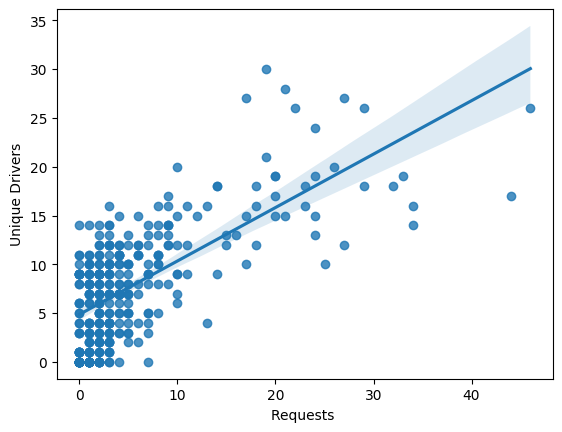

In [230]:
# 7. True or False: Driver supply always increases when demand increases during the two week period
sns.regplot(df, x='Requests ', y='Unique Drivers')

In [231]:
X = df['Requests ']
y = df['Unique Drivers']
model = OLS(y, X)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Unique Drivers   R-squared (uncentered):                   0.656
Model:                            OLS   Adj. R-squared (uncentered):              0.655
Method:                 Least Squares   F-statistic:                              637.6
Date:                Mon, 03 Feb 2025   Prob (F-statistic):                    1.56e-79
Time:                        23:13:13   Log-Likelihood:                         -1066.0
No. Observations:                 336   AIC:                                      2134.
Df Residuals:                     335   BIC:                                      2138.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Requests       0.8635      0.034     25.252      0.000       0.796       0.931
==============================================================================
Omnibus:                       52.404   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.549
Skew:                          -0.806   Prob(JB):                     3.63e-25
Kurtosis:                       5.333   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the t-statistic and F-statistic, we can say that the linear model is accurate for capturing the relationship between supply and demand. Also, the linear model captures about 66% of the variance of supply based on demand.

In [237]:
# 8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?
three_day_period = df.iloc[: 72, : 4]
ratios = three_day_period['Zeroes '] / three_day_period['Eyeballs ']
for i in range(1, df.shape[0] - 73):
  new_three_day_period = df.iloc[i : i + 72, : 4]
  new_ratios = new_three_day_period['Zeroes '] / new_three_day_period['Eyeballs ']
  if new_ratios.max() > ratios.max():
    ratios = new_ratios
    three_day_period = new_three_day_period
f'The ratio of Zeroes to Eyeballs is the highest during: {three_day_period.iloc[0, 0].strftime("%d %b %Y")} {three_day_period.iloc[0, 1]}am  to {three_day_period.iloc[-1, 0].strftime("%d %b %Y")} {three_day_period.iloc[-1, 1] + 1}am'

'The ratio of Zeroes to Eyeballs is the highest during: 10 Sep 2012 7am  to 13 Sep 2012 6am'

In [233]:
# 9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?
# Hint: Consider both rider eyeballs and driver supply when choosing
counts = df[df['Eyeballs '] - df['Unique Drivers'] == 5].groupby('Time (Local)').count().reset_index().iloc[:, : 2]
considered_hour = counts.rename(columns={'Date': 'Count'}).sort_values(by = 'Count', ascending=False).iloc[0, 0]
f'I would add 5 drivers to the hour {considered_hour}'

'I would add 5 drivers to the hour 8'

In [234]:
# 10. True or False: There is exactly two weeks of data in this analysis
df['Time (Local)'].value_counts()

,count
Time (Local),
7,14
8,14
5,14
4,14
3,14
2,14
1,14
0,14
23,14


As we can see, there are 14 records for each of the 24 hours and hence we can infer that there is exactly 2 weeks of data in the analysis

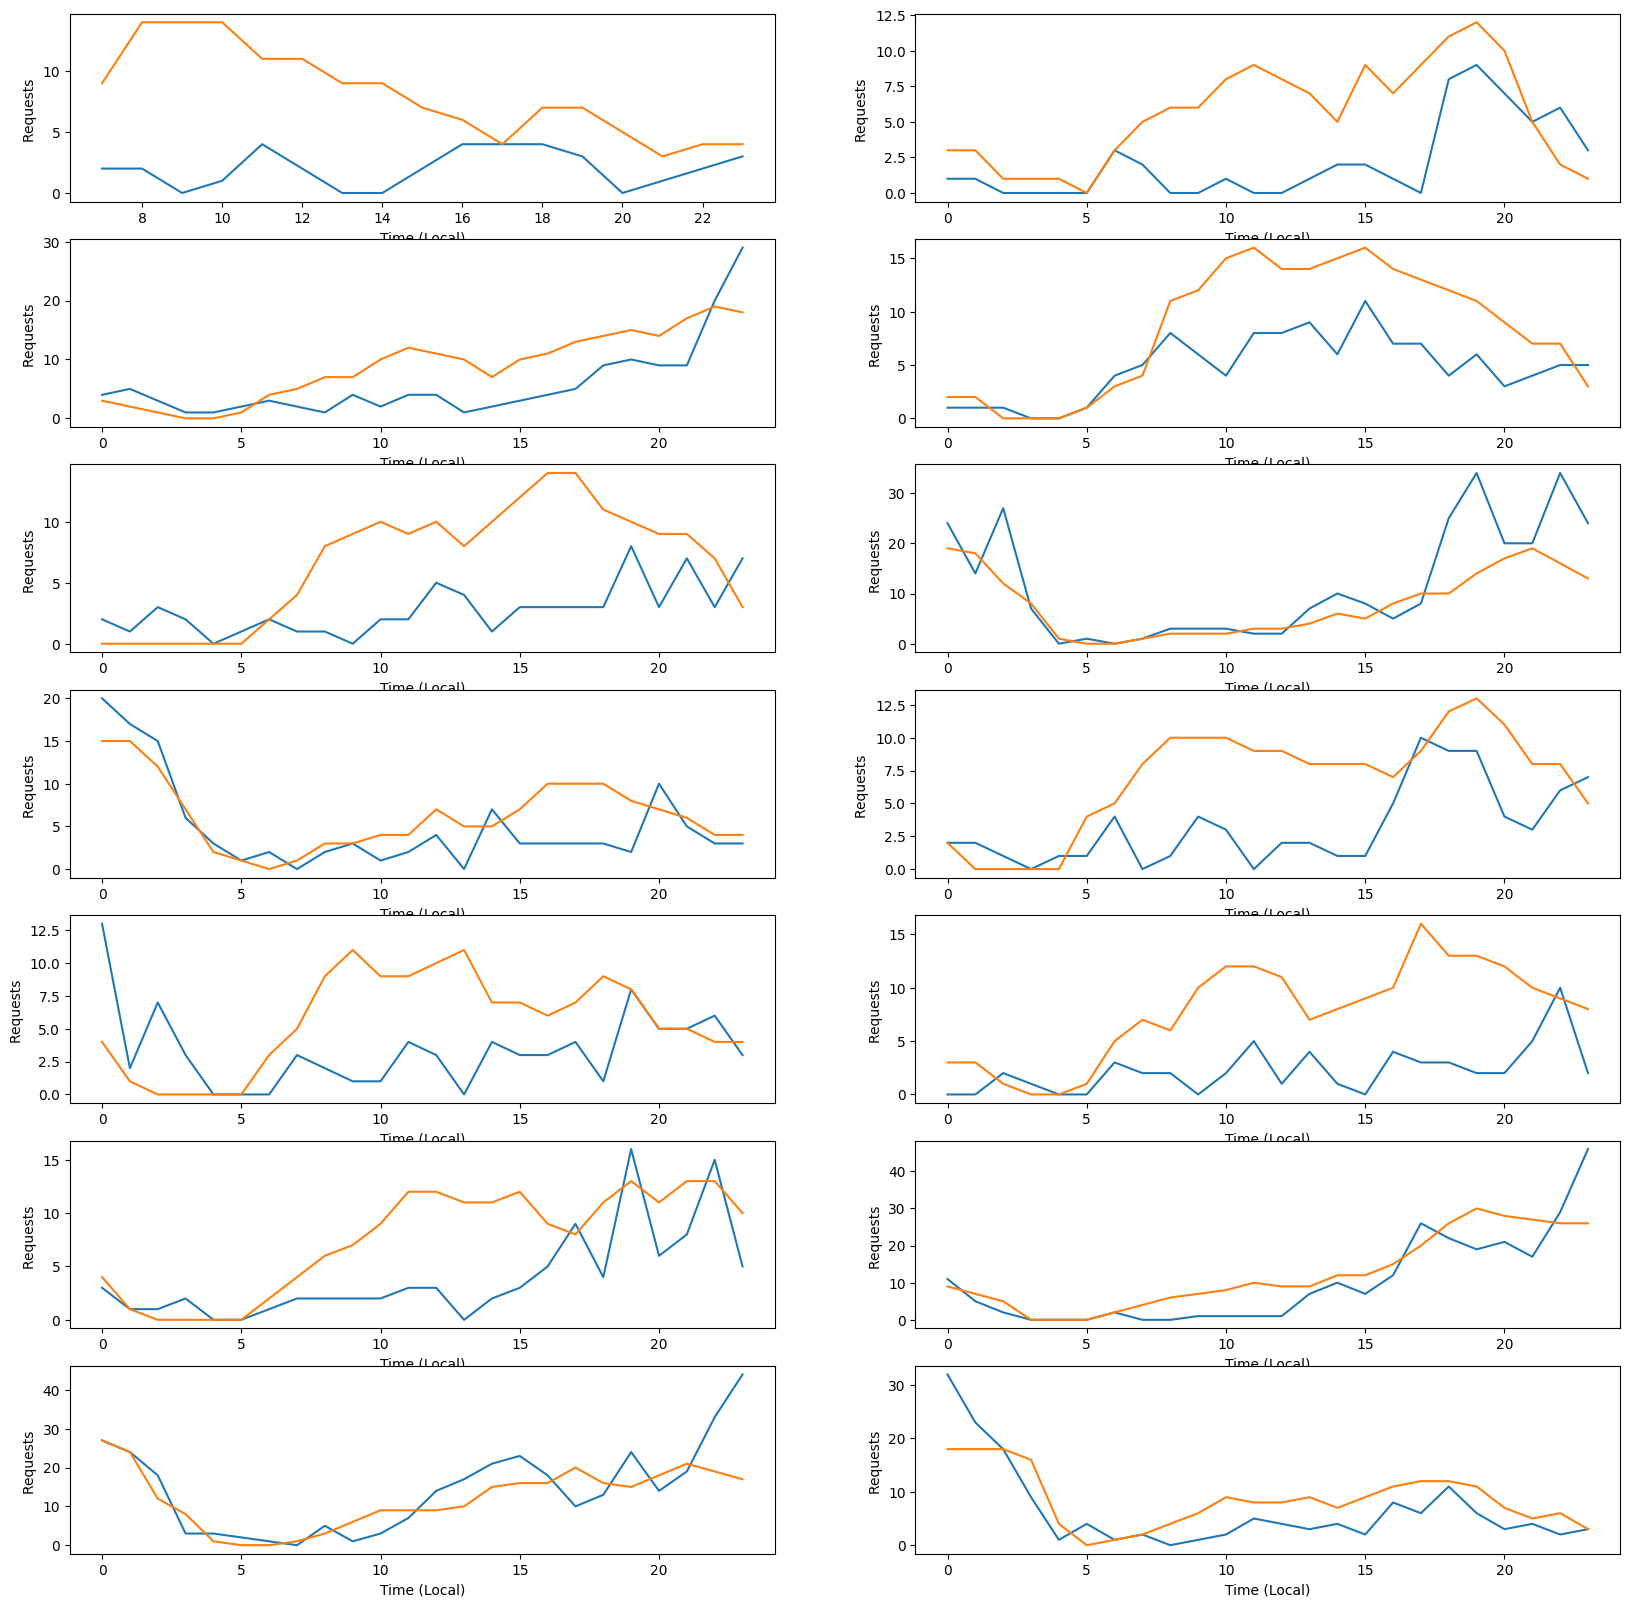

In [235]:
# 11. Looking at the data from all two weeks, which time might make the most sense
# to consider a true "end day" instead of midnight? (i.e when are supply and
# demand at both their natural minimums)
# Tip: Visualize the data to confirm your answer if needed.
fig, ax = plt.subplots(nrows=7, ncols=2)
dates = list(set(df['Date'].values))
ctr = 0
for i in range(7):
  for j in range(2):
    sns.lineplot(df[df['Date'] == dates[ctr]], x = 'Time (Local)', y = 'Requests ', ax=ax[i, j])
    sns.lineplot(df[df['Date'] == dates[ctr]], x = 'Time (Local)', y = 'Unique Drivers', ax=ax[i, j])
    ctr += 1
fig.set_size_inches((20, 20))
plt.show()

Based on the plots, I can infer that the hour 4 i.e. 4am can be considered the true "end day" as supply and demand are at the minimum